In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

[]

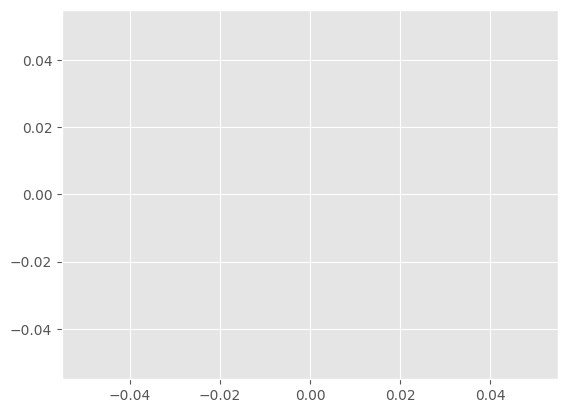

In [2]:
PATH = "../data/shakespeare.txt"
sw = stopwords.words('english')
plt.style.use('ggplot')
plt.plot()

In [3]:
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [4]:
# remove new lines:
lines = [line.rstrip('\n') for line in lines]

In [5]:
# lower case:
lines = [line.lower() for line in lines]

In [6]:
# remove punctuations and each line:
lines = [line.translate(str.maketrans('','', string.punctuation)) for line in lines]

In [7]:
# tokenize:

lines = [word_tokenize(line) for line in lines]

In [8]:
def remove_stopwords(lines, sw = sw):

    '''remove stopwords from tokenized lines'''
    
    res = []
    for line in lines:
        original = line

        line = [ w for w in line if w not in sw]

        if len(line) < 1:
            line = original
        res.append(line)
    return res

filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [ ]:
# Embedding model

w = w2v(
    filtered_lines,
    min_count=3,
    sg = 1,
    window=7
)

print(w.wv.most_similar('thou'))

w.wv.most_similar('thou)


In [10]:
emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,-0.025297,0.215564,0.535138,0.480429,-0.561354,-0.603358,0.475601,0.595959,-0.299315,-0.133712,...,0.191411,-0.158970,0.184790,0.011152,0.669572,0.600245,-0.756454,-0.628646,-0.336341,0.573921
thy,-0.101486,0.308364,0.469121,0.160585,-0.062489,-0.584700,0.547643,0.843645,-0.258109,-0.267733,...,-0.128202,-0.292399,0.320615,-0.316840,0.284840,-0.084967,-0.011473,-0.427724,-0.040607,0.040527
shall,-0.066648,0.050905,0.171386,-0.003936,0.394151,-0.297415,0.108200,0.419744,-0.301759,0.146698,...,0.245906,0.093716,-0.102743,-0.340360,0.338504,0.005390,0.149336,-0.005791,0.235884,-0.052535
thee,-0.302360,0.255761,0.737618,0.052104,0.149319,-0.348739,0.268912,0.596579,0.073579,-0.369809,...,0.292485,-0.403615,-0.138778,-0.295060,0.541957,0.349694,-0.085245,-0.311579,0.078828,0.165381
good,-0.249349,0.436192,0.633790,-0.246310,0.237667,-0.267243,0.032840,0.913882,-0.273369,0.193865,...,0.374041,-0.170100,0.273670,0.031134,0.509774,-0.202218,-0.207354,-0.269504,0.448302,-0.083001


[]

<Figure size 640x480 with 0 Axes>

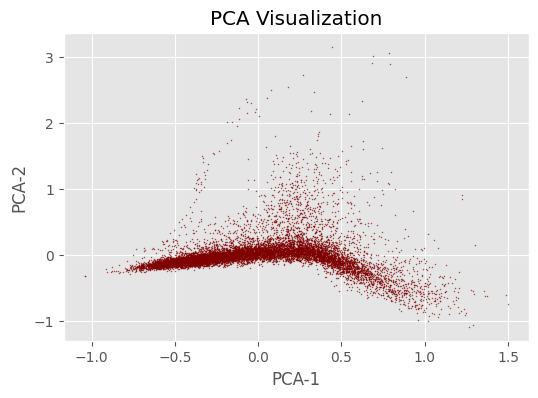

In [11]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()